In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [7]:
tested_data = pd.read_csv("GUIDE_Test.csv")

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_10416\3969604812.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  tested_data = pd.read_csv("GUIDE_Test.csv")


In [8]:
tested_data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [9]:
list(tested_data.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [10]:
pd.set_option('display.max_columns', None)
tested_data.head(5)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [11]:
tested_data.shape

(4147992, 46)

In [12]:
tested_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

DATACLEANING AND PREPROCESSING

In [13]:
tested_data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [14]:
missing_percentage=(tested_data.isnull().sum()/(len(tested_data)))*100
missing_percentage

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       55.619779
IncidentGrade          0.000000
ActionGrouped         99.953881
ActionGranular        99.953881
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.994526
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [15]:
threshold= len(tested_data)* 0.5   
tested_data=tested_data.dropna(thresh=threshold,axis=1)

In [16]:
tested_data.shape

(4147992, 36)

In [17]:
tested_data.duplicated().sum()

np.int64(225297)

In [18]:
tested_data.drop_duplicates(inplace=True)

In [19]:
tested_data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [20]:
tested_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName     int

In [21]:
tested_data.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

In [22]:
tested_data['Timestamp']=pd.to_datetime(tested_data['Timestamp'])

In [23]:
tested_data['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [24]:
tested_data["Day"]=tested_data["Timestamp"].dt.day
tested_data["Month"]=tested_data["Timestamp"].dt.month
tested_data["Year"]=tested_data["Timestamp"].dt.year
tested_data["Hour"]=tested_data["Timestamp"].dt.hour
tested_data["Time"]=tested_data["Timestamp"].dt.time

In [25]:
tested_data.drop("Timestamp",axis=1, inplace=True)   

In [26]:
tested_data.head(1)

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,22,22:56:27


In [27]:
tested_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1630942
TruePositive      1422856
FalsePositive      868897
Name: count, dtype: int64

In [28]:
tested_data.Category.unique()

array(['LateralMovement', 'CommandAndControl', 'InitialAccess',
       'Discovery', 'SuspiciousActivity', 'Impact', 'CredentialAccess',
       'Exfiltration', 'UnwantedSoftware', 'DefenseEvasion', 'Malware',
       'Execution', 'Persistence', 'CredentialStealing', 'Collection',
       'Ransomware', 'Exploit', 'PrivilegeEscalation', 'WebExploit'],
      dtype=object)

In [29]:
tested_data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
Day                   0
Month                 0
Year                  0
Hour                  0
Time                  0
dtype: int64

In [30]:
tested_data.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour
count,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06
mean,8.460813e+11,1.672382e+02,6.816684e+04,4.223519e+05,1.060836e+02,2.673215e+03,9.557739e+04,1.278995e+05,2.831923e+05,1.512210e+05,3.538441e+05,4.796591e+05,3.426203e+05,3.585862e+05,1.410906e+05,4.888493e+05,1.627333e+03,6.344917e+02,8.591662e+02,2.198089e+03,3.338514e+03,8.808010e+02,2.604752e+05,1.068323e+05,3.583399e+03,4.893778e+00,6.459252e+01,2.210860e+02,1.338802e+03,9.840989e+03,9.689893e+00,5.901661e+00,2.024000e+03,1.222813e+01
std,4.919382e+11,3.678578e+02,1.204018e+05,4.623677e+05,4.190355e+02,1.071732e+04,1.659185e+04,3.537271e+04,1.429193e+05,3.614132e+04,1.658293e+05,2.847006e+05,1.592405e+05,1.737347e+05,3.967719e+04,1.296834e+05,7.590552e+01,1.770122e+01,2.624437e+01,3.405457e+02,5.237770e+02,1.273373e+01,8.392960e+04,3.340397e+04,9.267115e+01,7.194654e-01,9.525676e+00,6.666060e+01,3.721316e+02,2.766539e+03,6.321079e+00,3.008862e-01,3.878203e-03,6.746927e+00
min,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.023000e+03,0.000000e+00
25%,4.209068e+11,7.000000e+00,3.780000e+02,2.101500e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,1.266150e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,5.000000e+00,6.000000e+00,2.024000e+03,7.000000e+00
50%,8.332237e+11,3.900000e+01,7.253000e+03,2.467610e+05,8.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,8.000000e+00,6.000000e+00,2.024000e+03,1.300000e+01
75%,1.271310e+12,1.520000e+02,7.754600e+04,7.092510e+05,4.200000e+01,1.470000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,1.200000e+01,6.000000e+00,2.024000e+03,1.800000e+01
max,1.709397e+12,6.138000e+03,5.997000e+05,1.721457e+06,9.520000e+03,1.131690e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,3.100000e+01,1.200000e+01,2.024000e+03,2.300000e+01


EXPLORATORY DATA ANALYSIS

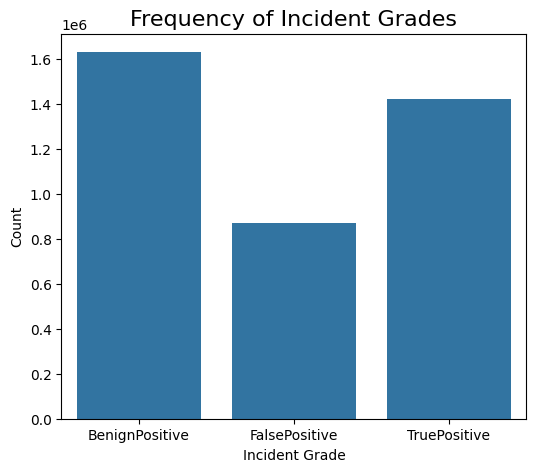

In [31]:
plt.figure(figsize=(6, 5))
sns.countplot(
    x="IncidentGrade",  
    data=tested_data,  
)
plt.title("Frequency of Incident Grades", fontsize=16)
plt.xlabel("Incident Grade", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

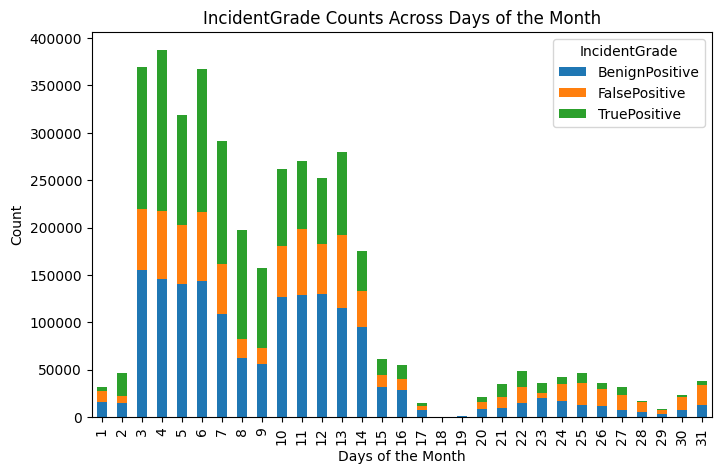

In [32]:
tested_data.groupby(['Day', 'IncidentGrade']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(8, 5), title='IncidentGrade Counts Across Days of the Month'
)
plt.xlabel('Days of the Month')
plt.ylabel('Count')
plt.legend(title='IncidentGrade')
plt.show()

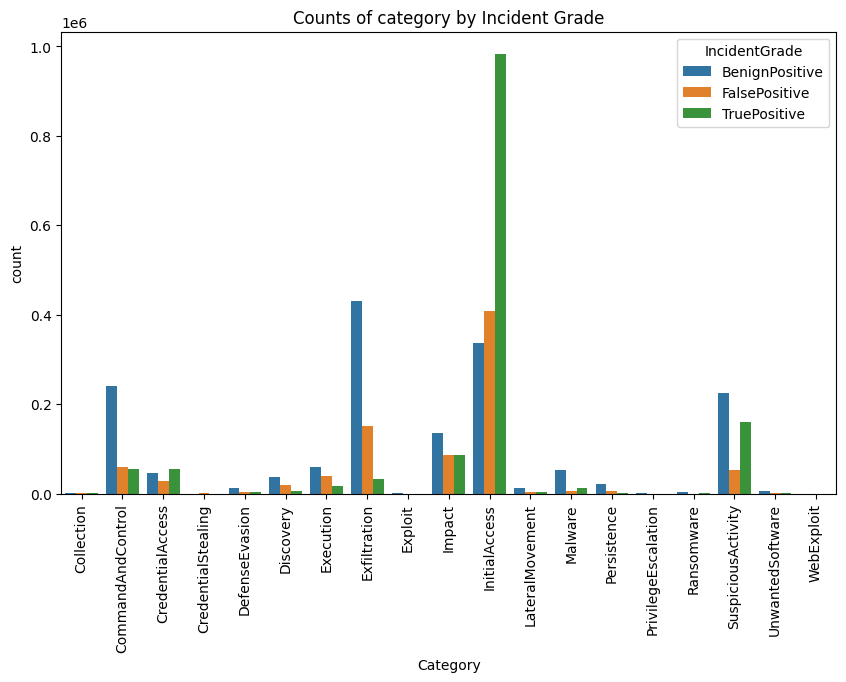

In [33]:
grouped_data=tested_data.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show() 

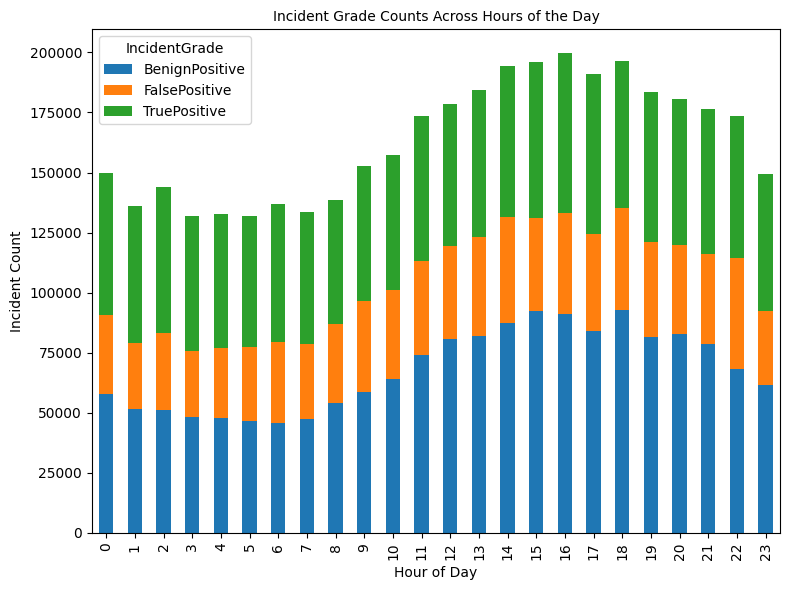

In [34]:
hour_incident = tested_data.groupby(['Hour', 'IncidentGrade']).size().unstack(fill_value=0)

hour_incident.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel("Hour of Day")
plt.ylabel('Incident Count')
plt.title('Incident Grade Counts Across Hours of the Day', fontsize=10)

plt.tight_layout()
plt.show()

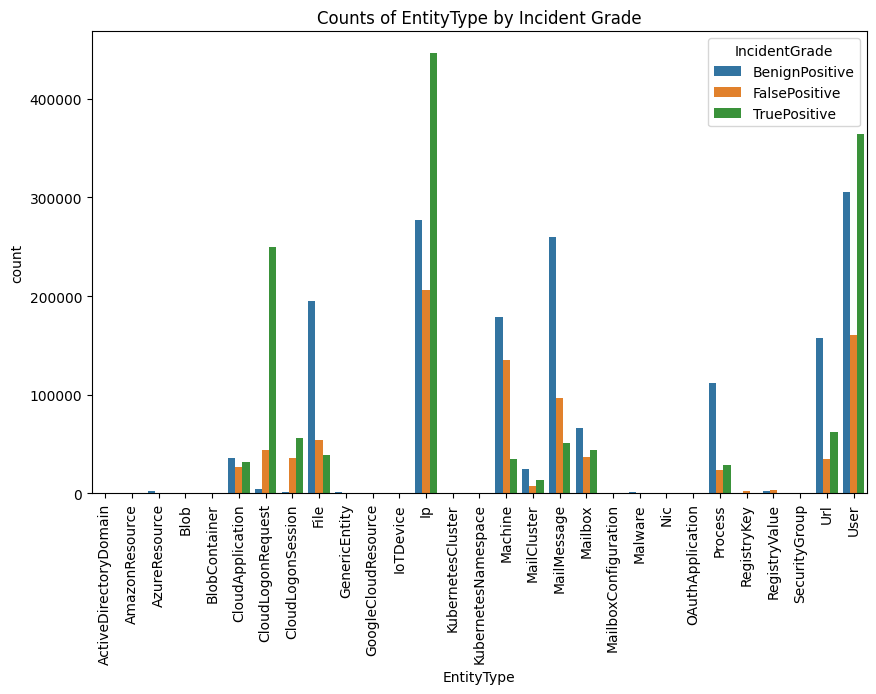

In [35]:
grouped_data=tested_data.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()

In [36]:
tested_data.drop(["Month","DeviceName","DeviceId","ResourceIdName","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)

In [37]:
tested_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 34 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Id                 int64 
 1   OrgId              int64 
 2   IncidentId         int64 
 3   AlertId            int64 
 4   DetectorId         int64 
 5   AlertTitle         int64 
 6   Category           object
 7   IncidentGrade      object
 8   EntityType         object
 9   EvidenceRole       object
 10  Sha256             int64 
 11  IpAddress          int64 
 12  Url                int64 
 13  AccountSid         int64 
 14  AccountUpn         int64 
 15  AccountObjectId    int64 
 16  AccountName        int64 
 17  RegistryKey        int64 
 18  RegistryValueName  int64 
 19  RegistryValueData  int64 
 20  ApplicationId      int64 
 21  ApplicationName    int64 
 22  FileName           int64 
 23  FolderPath         int64 
 24  OSFamily           int64 
 25  OSVersion          int64 
 26  CountryCode        

FEATURE SELECTION AND CORRELATION

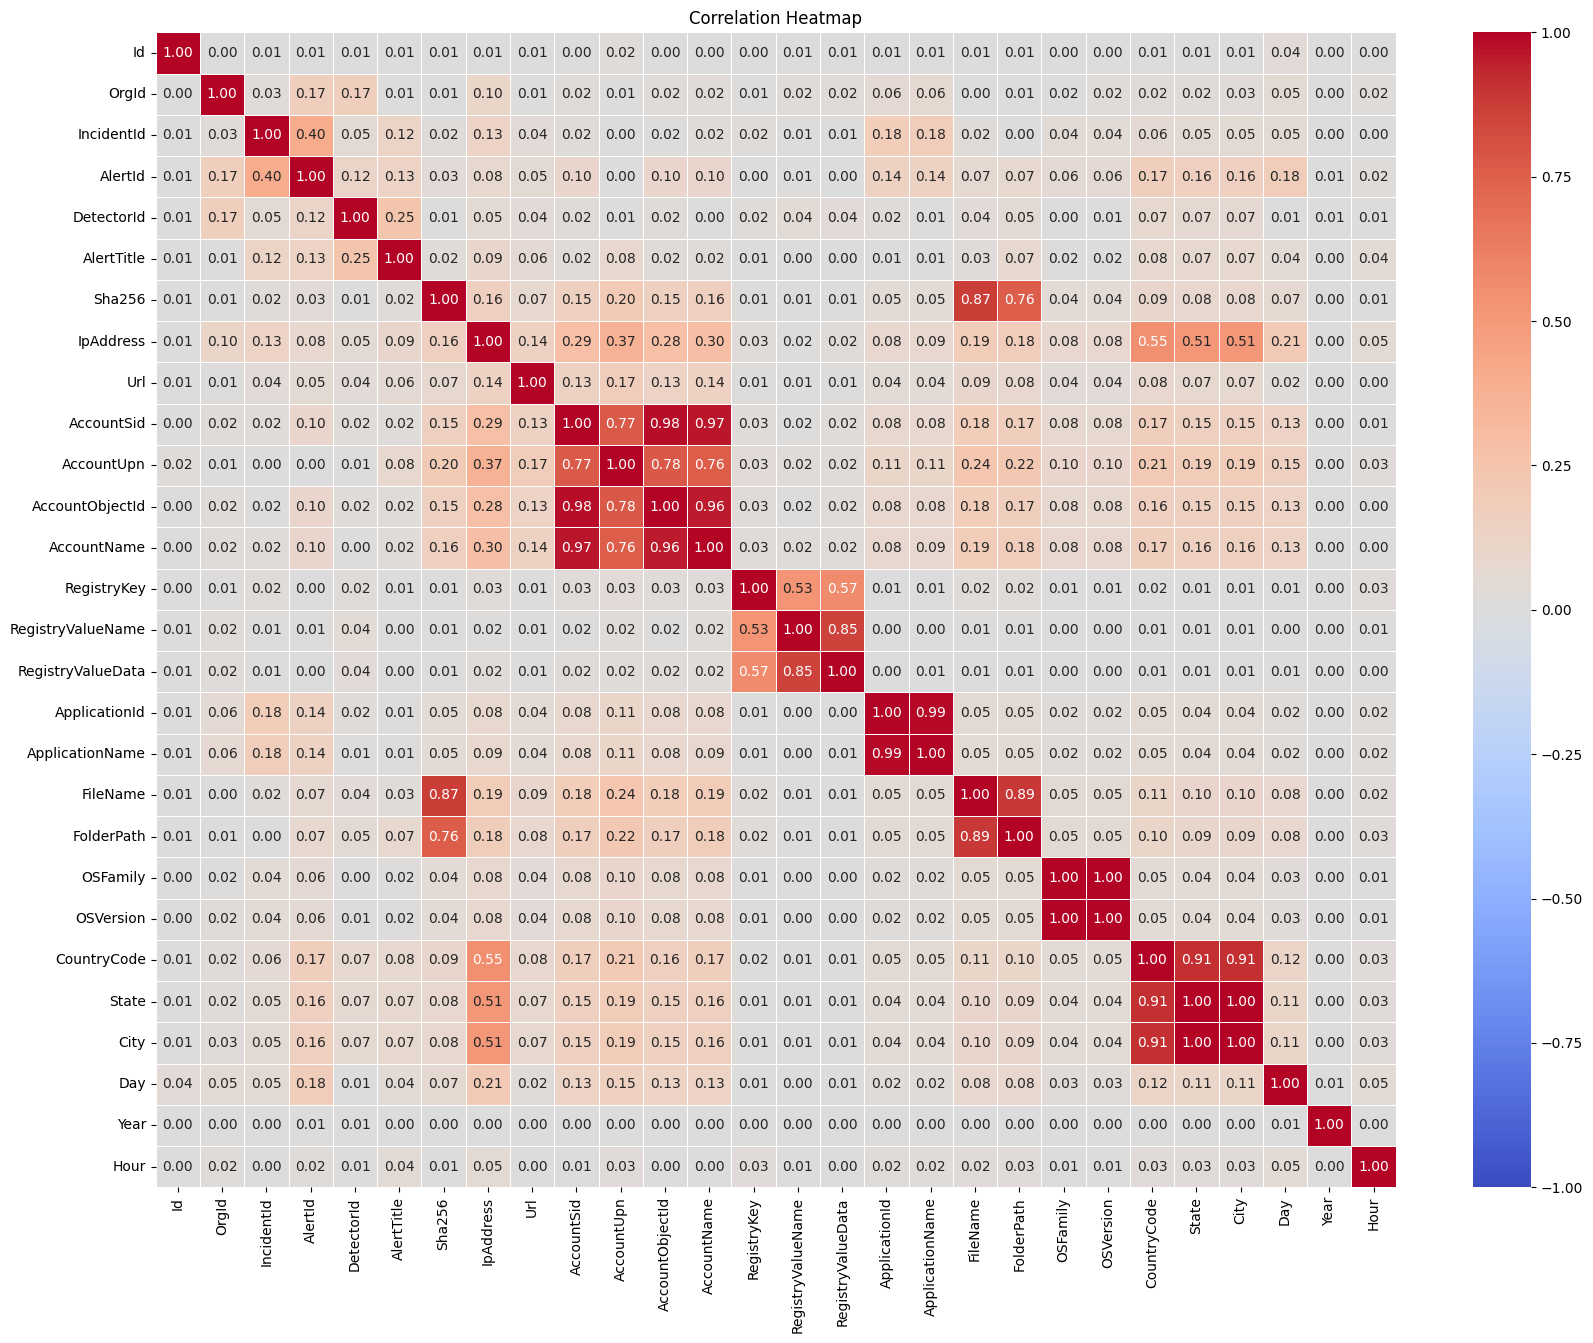

In [38]:
numeric_df=tested_data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
tested_data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)

In [40]:
tested_data.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)

In [41]:
tested_data.drop(["OSFamily","OSVersion",'State','FileName','AccountName','Usage' ], axis =1 , inplace = True)

In [42]:
tested_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  ApplicationId  int64 
 11  City           int64 
 12  Day            int32 
 13  Year           int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(8), object(5)
memory usage: 463.9+ MB


ENCODING TECHNIQUE

In [43]:
tested_data.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [44]:
Categorical_test=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']

In [45]:
label_encoders = {}

for column in Categorical_test:
    le = LabelEncoder()
    tested_data[column] = le.fit_transform(tested_data[column])
    label_encoders[column] = le

In [46]:
tested_data

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,657,11767,87199,563,11,0,28,0,360606,160396,2251,10630,4,2024,22,82520
1,3,91158,632273,2,1,0,15,0,360606,160396,2251,10630,3,2024,12,46649
2,145,32247,131719,10807,11,0,23,1,360606,160396,2251,10630,8,2024,3,12037
3,222,15294,917686,0,10,1,7,1,360606,160396,2251,10630,12,2024,12,43594
4,363,7615,5944,18,5,0,28,0,360606,160396,2251,10630,6,2024,17,63665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,42,391,638112,7322,12,0,15,0,360606,160396,2251,10630,3,2024,20,73420
4147987,262,3017,227156,120,10,0,28,0,360606,160396,2251,10630,4,2024,3,13978
4147988,1323,31001,304819,196,10,0,28,0,360606,160396,2251,10630,4,2024,19,70279
4147989,47,3653,7243,29,1,1,12,1,1084,160396,2251,10630,15,2024,0,3020


In [47]:
tested_data.select_dtypes(include=["int32","int64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [48]:
tested_data.to_csv('datatested.csv',index= False)

CHECKING IMBALANCED DATASET

In [49]:
tested_data.head()

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,657,11767,87199,563,11,0,28,0,360606,160396,2251,10630,4,2024,22,82520
1,3,91158,632273,2,1,0,15,0,360606,160396,2251,10630,3,2024,12,46649
2,145,32247,131719,10807,11,0,23,1,360606,160396,2251,10630,8,2024,3,12037
3,222,15294,917686,0,10,1,7,1,360606,160396,2251,10630,12,2024,12,43594
4,363,7615,5944,18,5,0,28,0,360606,160396,2251,10630,6,2024,17,63665


In [50]:
X = tested_data.drop('IncidentGrade', axis=1)
y = tested_data['IncidentGrade']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [52]:
print("Class distribution before resampling:")
print(y_train.value_counts())

Class distribution before resampling:
IncidentGrade
0    1304754
2    1138285
1     695117
Name: count, dtype: int64


In [53]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("\nClass distribution after Random Oversampling:")
print(pd.Series(y_train_ros).value_counts())


Class distribution after Random Oversampling:
IncidentGrade
0    1304754
2    1304754
1    1304754
Name: count, dtype: int64


PREDICTING VALUES WITH PICKLED MODEL

In [54]:
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [55]:
tested_data = pd.read_csv('datatested.csv')

In [56]:
tested_data = tested_data.dropna() 

In [57]:
X = tested_data.drop('IncidentGrade', axis=1)
y = tested_data['IncidentGrade']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [59]:
expected_columns = model.feature_names_in_
X_test = X_test.reindex(columns=expected_columns, fill_value=0)

In [60]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [61]:
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')  
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_macro = f1_score(y_test, y_test_pred, average='macro')

metrics_summary_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
    'Testing Score': [test_accuracy, test_precision, test_recall, test_f1_macro]
})

print("\nRandom Forest - Training and Testing Metrics:")
print(metrics_summary_rf)



Random Forest - Training and Testing Metrics:
              Metric  Testing Score
0           Accuracy       0.797377
1  Precision (Macro)       0.871916
2     Recall (Macro)       0.755516
3   F1 Score (Macro)       0.780180


In [76]:
y_test_prob = model.predict_proba(X_test)  #Gives probability of target classification
print(y_test_prob)

[[0.54719906 0.20735212 0.24544882]]


In [88]:
X_test = pd.DataFrame([
    [657,11767,87199,563,11,28,0,360606,160396,2251,10630,4,2024,22,82520],
    [222,15294,917686,0,10,7,1,360606,160396,2251,10630,12,2024,12,43594],
    [1657,57605,1034338,15,10,28,0,360606,160396,2251,10630,12,2024,17,62724]
], columns=['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category', 'EntityType', 'EvidenceRole', 'IpAddress',
            'Url', 'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'])

y_test_pred = model.predict(X_test)

print(f"Predicted Target Values: {y_test_pred}")

Predicted Target Values: [0 1 0]
